In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings


Bad key text.latex.preview in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
warnings.simplefilter('ignore')

In [3]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [4]:
path = './data/'

df = pd.read_csv(path+'Coordinates_Preprocessed.csv')

In [5]:
df

,Building_Age,JS_Price,JS_BA,Population,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,IR,Region_Name,Building_Use,YearMonth,Shortest_Distance_to_Subway,Shortest_Distance_to_School,Shortest_Distance_to_Univ,Shortest_Distance_to_Park
0,14,22500,84.70,433809,4.1,90.4,95.3,91.0,107.634598,91.7,39900.00,0.967620,1.25,강동구,아파트,201703,218.546662,342.320637,2080.047982,159.232767
1,0,16000,17.45,662019,3.4,98.0,101.1,99.1,112.039216,131.7,18000.00,0.834577,1.25,송파구,오피스텔,201912,365.167081,428.396368,2078.432085,1250.766345
2,30,42000,108.47,553927,2.7,78.0,84.3,81.7,120.439963,74.7,135000.00,1.537764,2.50,강남구,아파트,201310,698.127221,334.807784,1514.222790,918.048403
3,4,48000,84.95,674828,2.9,72.9,80.0,77.1,114.366829,79.4,91646.15,1.145652,3.25,송파구,아파트,201110,536.947700,24.176463,3817.518298,838.633151
4,0,70000,84.99,302243,2.1,109.0,109.0,110.3,87.677816,167.9,108000.00,0.725826,2.50,서대문구,아파트,202208,1173.890039,335.949816,1165.416466,701.477137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,133000,84.86,530126,3.4,102.6,101.3,100.8,128.819696,158.1,193333.33,1.352069,0.50,강남구,아파트,202011,1341.605321,298.254673,3567.318940,1272.216183
4996,10,49000,84.91,427540,3.1,74.5,81.5,78.5,102.461258,74.2,81850.00,1.221012,3.00,서초구,아파트,201207,440.715060,269.506677,1053.568719,2804.609144
4997,0,23000,30.00,425539,4.5,93.9,98.0,94.1,94.786910,106.1,27038.00,0.907344,1.50,강동구,연립다세대,201803,364.897534,391.843327,1835.115994,251.807047
4998,0,71000,84.65,571614,3.8,106.9,103.8,103.4,117.233889,177.7,110000.00,0.671993,0.50,강서구,아파트,202106,0.000000,809.669099,2549.064034,864.197138


## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - YearMonth : 년월
    - Building_Age : 건물연식
    - JS_Price : 전세가
   
- Continous
    - Sell_Price : 매매 가격
    - JS_BA = JS_Building Area : 임대 면적
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    - HSP_index = 
    - Population : 인구수
    - Crime_Rates : 범죄율
    - Shortest_Distance_to_Subway : 가장 가까운 지하철역과의 거리
    - Shortest_Distance_to_School : 가장 가까운 초중고등학교와의 거리
    - Shortest_Distance_to_Univ : 가장 가까운 대학교와의 거리
    - Shortest_Distance_to_Park : 가장 가까운 공원과의 거리
    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Age                 5000 non-null   int64  
 1   JS_Price                     5000 non-null   int64  
 2   JS_BA                        5000 non-null   float64
 3   Population                   5000 non-null   int64  
 4   UR                           5000 non-null   float64
 5   LC_index                     5000 non-null   float64
 6   CA_index                     5000 non-null   float64
 7   TC_index                     5000 non-null   float64
 8   SDT_index                    5000 non-null   float64
 9   HSP_index                    5000 non-null   float64
 10  Sell_Price                   5000 non-null   float64
 11  Crime_Rates                  5000 non-null   float64
 12  IR                           5000 non-null   float64
 13  Region_Name       

### 범주형 변수 인코딩

In [11]:
# 범주형 변수 더미화 함수, 범주형 변수의 범주 레벨 간의 관계가 중요할 시 사용
def oh_encoding(df):
    # DataFrame의 복사본을 만듭니다.
    df_encoded = df.copy()
    columns_encoded = []
    for column in df.columns:
        if df[column].dtype == object:
            df_encoded = pd.get_dummies(df_encoded, columns=[column], prefix=column)
            columns_encoded.append(column)
    return df_encoded, columns_encoded

In [12]:
df_encoded, columns_encoded = oh_encoding(df)

### 전체 변수 스케일링

In [13]:
# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열 선택 (수치형 데이터만, 원핫인코딩 열 제외)
numeric_columns = df_encoded.select_dtypes(include=['float', 'int']).columns
numeric_columns = [col for col in numeric_columns if col not in columns_encoded]

# 데이터 정규화
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [ ]:
### 범주형 변수 인코딩

# 범주형 변수 더미화 함수, 범주형 변수의 범주 레벨 간의 관계가 중요할 시 사용
def oh_encoding(df):
    # DataFrame의 복사본을 만듭니다.
    df_encoded = df.copy()
    columns_encoded = []
    for column in df.columns:
        if df[column].dtype == object:
            df_encoded = pd.get_dummies(df_encoded, columns=[column], prefix=column)
            columns_encoded.append(column)
    return df_encoded, columns_encoded

df_encoded, columns_encoded = oh_encoding(df)

### 전체 변수 스케일링

# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열 선택 (수치형 데이터만, 원핫인코딩 열 제외)
numeric_columns = df_encoded.select_dtypes(include=['float', 'int']).columns
numeric_columns = [col for col in numeric_columns if col not in columns_encoded]

# 데이터 정규화
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

## Regression Analysis

In [10]:
df_encoded.columns

Index(['Building_Age', 'JS_Price', 'JS_BA', 'Population', 'UR', 'LC_index',
       'CA_index', 'TC_index', 'SDT_index', 'HSP_index', 'Sell_Price',
       'Crime_Rates', 'IR', 'Shortest_Distance_to_Subway',
       'Shortest_Distance_to_School', 'Shortest_Distance_to_Univ',
       'Shortest_Distance_to_Park', 'Region_Name_encoded', 'YearMonth_encoded',
       'Building_Use_encoded'],
      dtype='object')

In [11]:
selected_features = ['CA_index',
 'Shortest_Distance_to_Subway',
 'JS_BA',
 'YearMonth_encoded',
 'HSP_index',
 'Region_Name_encoded',
 'TC_index',
 'SDT_index',
 'Sell_Price',
 'IR',
 'LC_index',
 'Building_Use_encoded']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     979.1
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:35:28   Log-Likelihood:                 8526.8
No. Observations:                5000   AIC:                        -1.703e+04
Df Residuals:                    4987   BIC:                        -1.694e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## 변수선택법
- 다중공선성과 회귀계수의 통계적 유의성 고려하여 진행

In [12]:
# X 데이터에서 상수항 제거 (VIF 계산에서 상수항은 제외해야 함)
X_without_constant = X.drop('const', axis=1)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X_without_constant.columns
vif["VIF"] = [variance_inflation_factor(X_without_constant.values, i) for i in range(X_without_constant.shape[1])]

In [13]:
vif

,Features,VIF
0,CA_index,596.408825
1,Shortest_Distance_to_Subway,3.023034
2,JS_BA,7.997720
3,YearMonth_encoded,65.705141
4,HSP_index,39.540753
5,Region_Name_encoded,13.928126
6,TC_index,568.291244
7,SDT_index,17.602970
8,Sell_Price,5.108589
9,IR,10.237808


In [14]:
model = pd.DataFrame(model.summary().tables[1])
model

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,-0.0507,0.008,-6.018,0.000,-0.067,-0.034
2,CA_index,-0.0038,0.029,-0.130,0.897,-0.061,0.053
3,Shortest_Distance_to_Subway,-0.0302,0.006,-5.201,0.000,-0.042,-0.019
4,JS_BA,0.2679,0.006,43.641,0.000,0.256,0.280
5,YearMonth_encoded,0.2613,0.046,5.677,0.000,0.171,0.351
6,HSP_index,-0.0344,0.009,-3.851,0.000,-0.052,-0.017
7,Region_Name_encoded,0.2845,0.021,13.332,0.000,0.243,0.326
8,TC_index,-0.0096,0.029,-0.332,0.740,-0.066,0.047
9,SDT_index,0.0026,0.005,0.497,0.619,-0.008,0.013


In [15]:
delete_columns = []
for i in range(2, len(model.index)):
    if float(model.iloc[i, 4].data) > 0.05 and vif['VIF'].iloc[i-2] > 10:
        delete_columns.append(model.iloc[i, 0].data)
delete_columns

['CA_index', 'TC_index', 'SDT_index', 'LC_index']

In [16]:
selected_features = list(set(selected_features) - set(delete_columns))
selected_features

['Sell_Price',
 'HSP_index',
 'YearMonth_encoded',
 'Building_Use_encoded',
 'JS_BA',
 'IR',
 'Shortest_Distance_to_Subway',
 'Region_Name_encoded']

In [17]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1447.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:35:28   Log-Likelihood:                 8499.7
No. Observations:                5000   AIC:                        -1.698e+04
Df Residuals:                    4991   BIC:                        -1.692e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [18]:
selected_features.remove('HSP_index')

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1654.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:35:28   Log-Likelihood:                 8499.6
No. Observations:                5000   AIC:                        -1.698e+04
Df Residuals:                    4992   BIC:                        -1.693e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- 모든 변수가 통계적으로 유의한 것을 확인할 수 있다.

## 모델가정 확인

### 선형성
- 선형성은 계수의 유의성 검정과 다중공선성을 고려하여 변수를 걸러냄으로써 어느 정도 만족하는 것으로 보인다.

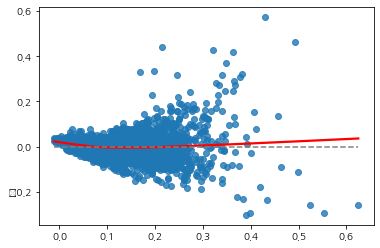

In [19]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})

plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

### 정규성

ShapiroResult(statistic=0.8110162615776062, pvalue=0.0)

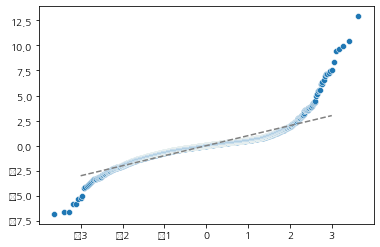

In [20]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# Scatterplot 그리기
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# Shapiro-Wilk 정규성 검정
scipy.stats.shapiro(residual)

- 정규성 만족을 위해 종속변수 로그변환한 뒤 다시 정규성 확인

In [21]:
df_encoded['JS_Price'] = np.log(df_encoded['JS_Price']+1)

In [22]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

ShapiroResult(statistic=0.8795036673545837, pvalue=0.0)

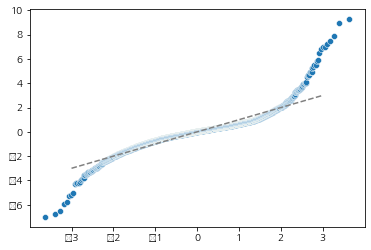

In [23]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Scatterplot 그리기
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# Shapiro-Wilk 정규성 검정
scipy.stats.shapiro(residual)

### 등분산성

<AxesSubplot:>

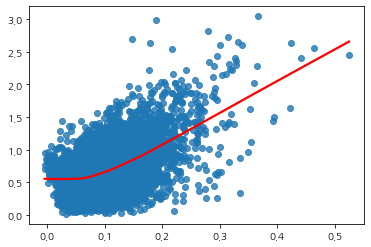

In [24]:
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

### 독립성

In [25]:
print(model.summary().tables[2])

Omnibus:                     1298.426   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26592.952
Skew:                           0.731   Prob(JB):                         0.00
Kurtosis:                      14.203   Cond. No.                         76.4


- Durbin-Watson:2.002로 1.5~2.5사이이므로 잔차 간의 자기상관이 없다고 할 수 있으며, 회귀 모델은 독립성 가정을 만족

## 최종 모델 점검

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:35:35   Log-Likelihood:                 9640.5
No. Observations:                5000   AIC:                        -1.927e+04
Df Residuals:                    4992   BIC:                        -1.921e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [27]:
model.params.sort_values(ascending=False)

YearMonth_encoded              0.439615
Sell_Price                     0.323678
Region_Name_encoded            0.261614
JS_BA                          0.229815
IR                            -0.013241
Shortest_Distance_to_Subway   -0.028567
const                         -0.047188
Building_Use_encoded          -0.094561
dtype: float64